In [9]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Load in the dataframe
df = pd.read_csv("./Lista_palabras.csv")

In [11]:
df.head()

,word,freq
0,light,1581
1,object,879
2,sky,736
3,wa,581
4,bright,539


(-0.5, 399.5, 199.5, -0.5)

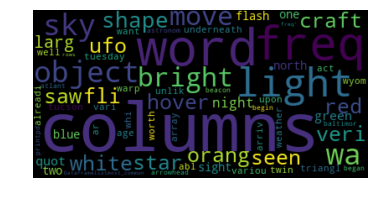

In [12]:
# Start with one review:
text = str(df)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

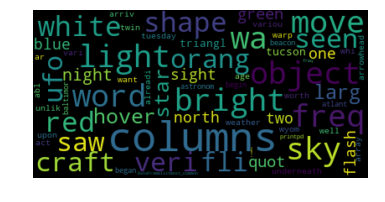

In [13]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
wordcloud.to_file("UFO_most_common.png")

In [15]:
ufo_mask = np.array(Image.open("./monstruos.png"))
ufo_mask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [20]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
    # Transform your mask into a new one that will work with the function:
transformed_ufo_mask = np.ndarray((ufo_mask.shape[0],ufo_mask.shape[1]), np.int32)

for i in range(len(ufo_mask)):
    transformed_ufo_mask[i] = list(map(transform_format, ufo_mask[i]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

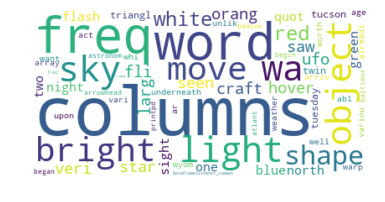

In [17]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["44", "35", "NaN"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_ufo_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("ufo.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

ValueError: Got mask of invalid shape: ()